# Rejection sampling

In what follows, we will implement rejection methods for sampling continuous distributions.

Let us implement here Example 2.8 of lecture notes.

First let us describe the Beta density.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def beta_pdf(x, alpha, beta):
    return (x**(alpha-1) * (1-x)**(beta-1) * np.math.gamma(alpha+beta) /
            (np.math.gamma(alpha) * np.math.gamma(beta)))

Now we are ready to implement the rejection method as shown in Example 2.8.

**Example 2.8.** We aim at sampling from $p(x) = \text{Beta}(x;\alpha,\beta)$ with $\alpha = \beta = 2$. We will do this in a way that will demonstrate the Fundamental Theorem of Simulation. As noted in the example, we know that $p^\star = 1.5$ in this case, which is the maximum of this density. In order to draw samples under the curve $p(x)$, we will first sample uniformly in the "box" $(X', U') \sim \text{Unif}([0,1] \times [0, p^\star])$ and accept/reject samples if $U' \leq p(X')$. **Note that this sampler is just for demonstration as the rejection samplers**.

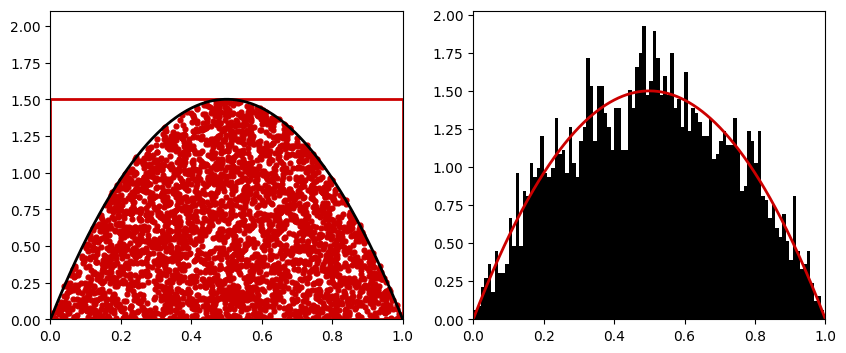

In [10]:
alpha = 2
beta = 2
p_star = 1.5

rng = np.random.default_rng(5)

xx = np.linspace(0, 1, 1000)

n = 5000

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# for demonstration purposes, we do this in a for loop
# this can be done all at once

acc_samples = np.array([])
acc_u = np.array([])
# note that we do not have to store uniform samples
# this is again for demonstration of the FTS.

for i in range(n):
    x = rng.uniform(0, 1)
    u = rng.uniform(0, p_star)

    if u <= beta_pdf(x, alpha, beta):
        acc_u = np.append(acc_u, u)
        acc_samples = np.append(acc_samples, x)

axs[0].plot(xx, beta_pdf(xx, alpha, beta), color='k', linewidth=2)
axs[0].add_patch(plt.Rectangle((0, 0), 1, p_star, color=[0.8, 0, 0], fill=False, lw=2))
axs[0].scatter(acc_samples, acc_u, color=[0.8, 0, 0], s=12)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 2.1)
axs[1].cla()
axs[1].plot(xx, beta_pdf(xx, alpha, beta), color=[0.8, 0, 0], linewidth=2)
axs[1].hist(acc_samples, bins=100, density=True, color='k')
axs[1].set_xlim(0, 1)
plt.show()

One can see the samples on the left that are uniformly distributed. On the right, the histogram of the accepted samples is shown (only accepted $x$ values which are `acc_samples` in the code). Animating this process is too costly in a notebook but is provided in the course.

Let us now implement **Example 2.12** of the lecture notes.

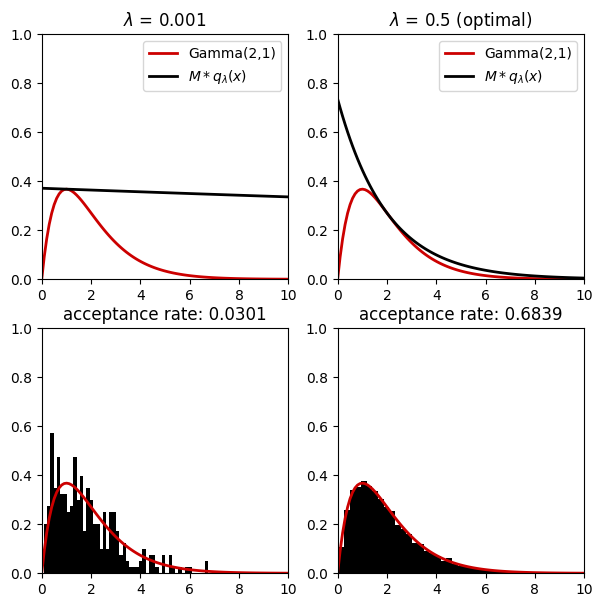

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling from Gamma(2,1) using rejection sampling

# Gamma(alpha, 1) density
def gamma_density(x, alpha):
    return x**(alpha - 1) * np.exp(-x) / np.math.factorial(alpha - 1)

def exponential_density(x, lam):
    return lam * np.exp(-lam * x)

def M(alpha, lam):
    return ((alpha - 1)/(1 - lam))**(alpha - 1) * np.exp(-(alpha - 1)) / (lam * np.math.factorial(alpha-1))

def gamma_rejection_sampling(alpha, lam, n):
    x = np.array([])
    acc = 0
    for i in range(n):
        x_prime = np.random.exponential(1/lam)
        u = np.random.uniform(0, 1)
        if u < gamma_density(x_prime, alpha) / (M(alpha, lam) * exponential_density(x_prime, lam)):
            x = np.append(x, x_prime)
            acc += 1

    return x, acc/n

alpha = 2
lam_1 = 0.01
n = 10000

x_lam_1, acc_rate_1 = gamma_rejection_sampling(alpha, lam_1, n)

alpha = 2
lam_2 = 1/alpha

x_lam_2, acc_rate_2 = gamma_rejection_sampling(alpha, lam_2, n)

xx = np.linspace(0, 10, 100)
fig, axs = plt.subplots(2, 2, figsize=(7, 7), width_ratios=[1, 1], height_ratios=[1, 1])
axs[0, 0].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[0, 0].plot(xx, M(alpha, lam_1) * exponential_density(xx, lam_1), color='k', linewidth=2)
axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_title('$\lambda$ = 0.001')
axs[0, 0].legend(['Gamma(2,1)', '$M * q_\lambda(x)$'])
axs[0, 1].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[0, 1].plot(xx, M(alpha, lam_2) * exponential_density(xx, lam_2), color='k', linewidth=2)
axs[0, 1].legend(['Gamma(2,1)', '$M * q_\lambda(x)$'])
axs[0, 1].set_xlim(0, 10)
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_title('$\lambda$ = 0.5 (optimal)')
axs[1, 0].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[1, 0].hist(x_lam_1, bins=50, density=True, color='k', alpha=1)
axs[1, 0].set_xlim(0, 10)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_title('acceptance rate: ' + str(acc_rate_1))
axs[1, 1].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[1, 1].hist(x_lam_2, bins=50, density=True, color='k', alpha=1)
axs[1, 1].set_xlim(0, 10)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_title('acceptance rate: ' + str(acc_rate_2))
plt.show()